# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report, ConfusionMatrixDisplay

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
def load_dataset():
    df = pd.read_csv("gun_clustered.csv")
    print(f"✅ Data loaded! Ukuran: {df.shape}")
    return df

df = load_dataset()
df.head()

✅ Data loaded! Ukuran: (9692, 6)


,Age,Reason,Education,Sex,Place of incident,cluster
0,60.0,Suicide,High School,Female,Home,2
1,52.0,Suicide,Some college,Male,Other specified,1
2,37.0,Homicide,Some college,Male,Street,3
3,74.0,Homicide,High School,Male,Other unspecified,0
4,28.0,Homicide,Some college,Male,Other unspecified,3


In [3]:
# 1️⃣ Identifikasi Kolom Kategorikal
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# 2️⃣ Label Encoding untuk Mengubah Kategori menjadi Numerik
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# 5️⃣ Menyimpan Data dalam Format Numerik
df.to_csv("data_numerik.csv", index=False)
print("✅ Semua data telah dikonversi ke numerik dan disimpan sebagai 'data_numerik.csv'.")

# 6️⃣ Menampilkan Data Numerik
print("\n Data dalam Format Numerik:")
print(df.head())


✅ Semua data telah dikonversi ke numerik dan disimpan sebagai 'data_numerik.csv'.

 Data dalam Format Numerik:
    Age  Reason  Education  Sex  Place of incident  cluster
0  60.0       2          1    0                  1        2
1  52.0       2          3    1                  3        1
2  37.0       1          3    1                  8        3
3  74.0       1          1    1                  4        0
4  28.0       1          3    1                  4        3


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [27]:
# Memisahkan fitur (X) dan target(y ='cluster')
X = df.drop(['cluster'], axis=1)
y = df['cluster']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Jumlah data latih: {len(X_train)}")
print(f"Jumlah data uji: {len(X_test)}")

Jumlah data latih: 7753
Jumlah data uji: 1939


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [5]:
# Training model
dt = DecisionTreeClassifier().fit(X_train, y_train)
svm = SVC().fit(X_train, y_train)
nb = GaussianNB().fit(X_train, y_train)
knn = KNeighborsClassifier().fit(X_train, y_train)
rf = RandomForestClassifier().fit(X_train, y_train)


print("Model training selesai.")

Model training selesai.


Tulis narasi atau penjelasan algoritma yang Anda gunakan.

### Algoritma yang Digunakan

Dalam proses klasifikasi ini, digunakan lima algoritma machine learning yang umum digunakan, yaitu **Decision Tree, Support Vector Machine (SVM), Naive Bayes, K-Nearest Neighbors (KNN), dan Random Forest.** Decision Tree bekerja dengan membuat pohon keputusan berdasarkan fitur-fitur pada data untuk memprediksi kelas target. SVM berupaya mencari hyperplane terbaik yang memisahkan kelas-kelas data dengan margin maksimal. Naive Bayes menerapkan prinsip probabilistik dengan asumsi independensi antar fitur, berdasarkan Teorema Bayes. KNN mengklasifikasikan data berdasarkan kedekatan atau jarak ke tetangga terdekat dalam ruang fitur. Sementara itu, Random Forest merupakan metode ensemble yang membentuk banyak pohon keputusan dan menggabungkan hasilnya untuk meningkatkan akurasi serta mengurangi risiko overfitting. Kelima algoritma ini dilatih menggunakan data latih untuk mempelajari pola yang ada sebelum dilakukan evaluasi performa.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [6]:
# Prediksi dengan Data Uji
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    results = {
        'Confusion Matrix': confusion_matrix(y_test, y_pred),
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1-Score': f1_score(y_test, y_pred, average='weighted')
    }
    return results

In [7]:
# Mengevaluasi setiap model dan mengumpulkan hasilnya
results = {
    'Decision Tree (DT)': evaluate_model(dt, X_test, y_test),
    'Support Vector Machine (SVM)': evaluate_model(svm, X_test, y_test),
    'Naive Bayes (NB)': evaluate_model(nb, X_test, y_test),
    'K-Nearest Neighbors (KNN)': evaluate_model(knn, X_test, y_test),
    'Random Forest (RF)': evaluate_model(rf, X_test, y_test)
}

summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

In [9]:
# Membuat DataFrame
rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })

summary_df = pd.DataFrame(rows)
print(summary_df)

                          Model  Accuracy  Precision    Recall  F1-Score
0            Decision Tree (DT)  0.999484   0.999485  0.999484  0.999484
1  Support Vector Machine (SVM)  0.722022   0.757779  0.722022  0.725656
2              Naive Bayes (NB)  0.987622   0.987736  0.987622  0.987642
3     K-Nearest Neighbors (KNN)  0.920578   0.921449  0.920578  0.920048
4            Random Forest (RF)  0.996906   0.996924  0.996906  0.996902


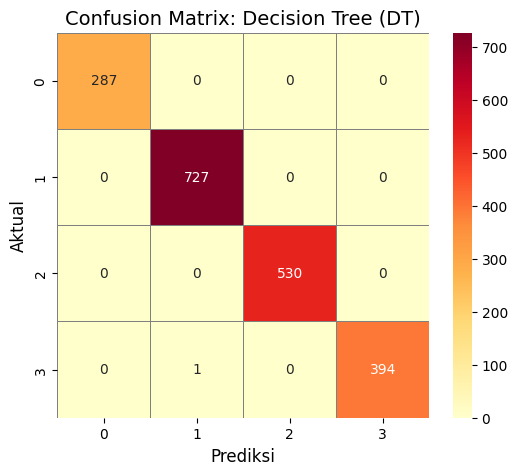

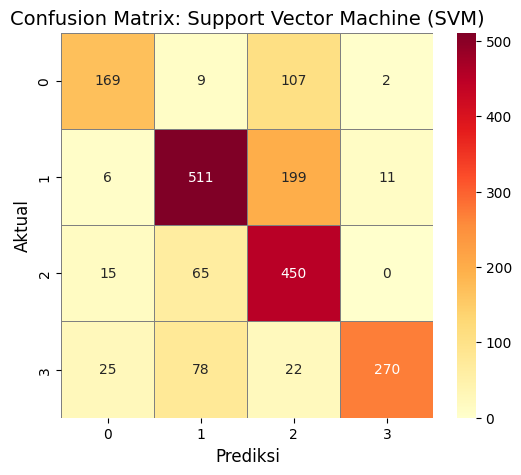

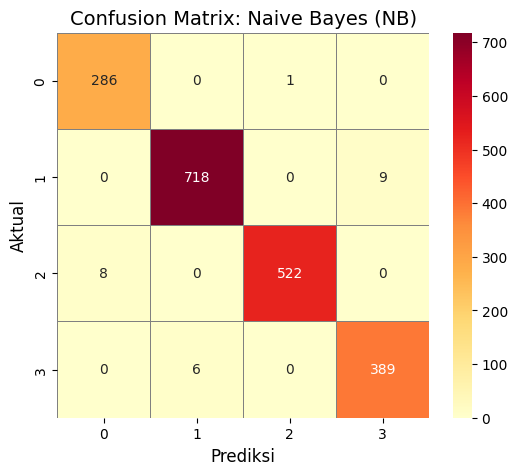

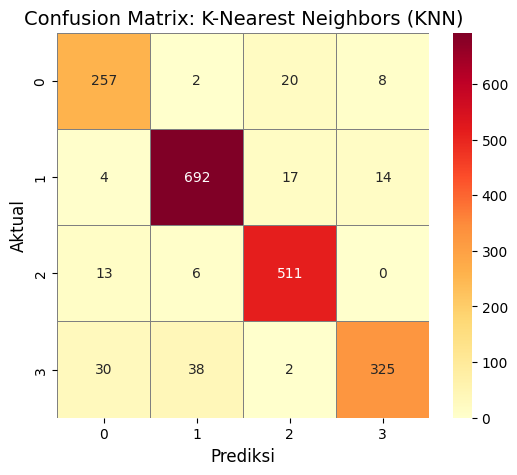

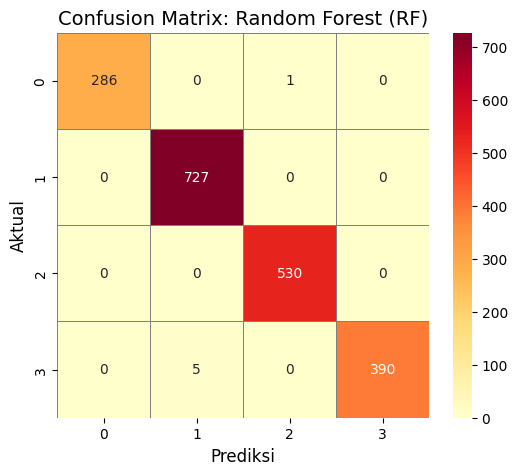

In [10]:
# Visualisasi plot confusion matrix
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrRd', linewidths=0.5, linecolor='gray')
    plt.title(f'Confusion Matrix: {model_name}', fontsize=14)
    plt.xlabel('Prediksi', fontsize=12)
    plt.ylabel('Aktual', fontsize=12)
    plt.show()

# Plot untuk setiap model
for model_name, metrics in results.items():
    cm = metrics['Confusion Matrix']
    plot_confusion_matrix(cm, model_name)

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

### Hasil Evaluasi

Berdasarkan hasil evaluasi sebelum tuning, algoritma **Decision Tree (DT) menunjukkan performa paling tinggi** dengan akurasi hampir sempurna, disusul oleh Random Forest (RF) yang selisihnya sangat tipis. Kedua model ini mampu mengklasifikasikan data secara sangat akurat dan konsisten. Naive Bayes (NB) menempati posisi ketiga dengan performa cukup tinggi, meskipun masih di bawah DT dan RF. Sementara itu, K-Nearest Neighbors (KNN) menunjukkan hasil yang cukup baik namun belum mampu menyamai ketepatan DT, RF, maupun NB. Support Vector Machine (SVM) menjadi model dengan performa paling rendah dalam klasifikasi data, menandakan perlunya peningkatan signifikan. Oleh karena itu, seluruh model tetap perlu dilakukan tuning untuk memaksimalkan kinerja, terutama pada model yang masih menunjukkan akurasi rendah.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

### 1. Tuning Model Klasifikasi Algoritma Decision Tree

In [18]:
# Parameter grid Decision Tree
param_dt = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Inisialisasi GridSearch
grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid=param_dt,
                       cv=3, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit model
grid_dt.fit(X_train, y_train)
print("Best Params Decision Tree:", grid_dt.best_params_)


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Params Decision Tree: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2}


### 2. Tuning Model Klasifikasi Algoritma Support Vector Machine

In [13]:
# Parameter grid Support Vector Machine
param_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf', 'linear'],
    'gamma': ['scale', 'auto']
}

# Inisialisasi GridSearch
grid_svm = GridSearchCV(SVC(), param_grid=param_svm, cv=3,
                        scoring='accuracy', n_jobs=-1, verbose=1)

# Fit Model
grid_svm.fit(X_train, y_train)
print("Best Params SVM:", grid_svm.best_params_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Params SVM: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}


### 3. Tuning Model Klasifikasi Algoritma Random Forest

In [14]:
# Parameter random untuk Random Forest
param_rf = {
    'n_estimators': [100, 200, 500],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False]
}

# Inisialisasi RandomizedSearch
random_rf = RandomizedSearchCV(RandomForestClassifier(random_state=42),
                               param_distributions=param_rf, n_iter=10,
                               cv=3, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit model
random_rf.fit(X_train, y_train)
print("Best Params Random Forest:", random_rf.best_params_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Params Random Forest: {'n_estimators': 100, 'min_samples_split': 2, 'max_depth': 10, 'bootstrap': False}


### 4. Tuning Model Klasifikasi Algoritma K-Nearest Neighbors

In [15]:
# Parameter grid K-Nearest Neighbors
param_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Inisialisasi GridSearch
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid=param_knn,
                        cv=3, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit model
grid_knn.fit(X_train, y_train)
print("Best Params KNN:", grid_knn.best_params_)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best Params KNN: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}


### 5. Tuning Model Klasifikasi Algoritma Naive Bayes

In [16]:
# Parameter grid Naive Bayes
param_nb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
}

# Inisialisasi GridSearch
grid_nb = GridSearchCV(GaussianNB(), param_grid=param_nb,
                       cv=3, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit model
grid_nb.fit(X_train, y_train)
print("Best Params Naive Bayes:", grid_nb.best_params_)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best Params Naive Bayes: {'var_smoothing': 1e-09}


In [20]:
# Estimator terbaik dari GridSearchCV dan RandomizedSearchCV
best_dt = grid_dt.best_estimator_
best_rf = random_rf.best_estimator_
best_svm = grid_svm.best_estimator_
best_knn = grid_knn.best_estimator_
best_nb = grid_nb.best_estimator_

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [21]:
# Evaluasi model setelah tuning
dt_tuning = evaluate_model(best_dt, X_test, y_test)
rf_tuning = evaluate_model(best_rf, X_test, y_test)
svm_tuning = evaluate_model(best_svm, X_test, y_test)
knn_tuning = evaluate_model(best_knn, X_test, y_test)
nb_tuning = evaluate_model(best_nb, X_test, y_test)

# Buat dataframe hanya untuk model setelah tuning
comparison_after = pd.DataFrame([
    {'Model': 'Decision Tree', **dt_tuning},
    {'Model': 'Random Forest', **rf_tuning},
    {'Model': 'SVM', **svm_tuning},
    {'Model': 'KNN', **knn_tuning},
    {'Model': 'Naive Bayes', **nb_tuning}
])

# Drop kolom Confusion Matrix dari tampilan agar fokus ke metrik utama
comparison_after_display = comparison_after.drop(columns=['Confusion Matrix'])

# Tampilkan hasil
print(comparison_after_display)

           Model  Accuracy  Precision    Recall  F1-Score
0  Decision Tree  0.999484   0.999485  0.999484  0.999484
1  Random Forest  0.999484   0.999485  0.999484  0.999484
2            SVM  0.981949   0.981937  0.981949  0.981902
3            KNN  0.945848   0.946547  0.945848  0.945599
4    Naive Bayes  0.987622   0.987736  0.987622  0.987642


### Analisis:

Setelah tuning, algoritma Decision Tree (DT) dan Random Forest (RF) memberikan hasil paling tinggi dan identik pada semua aspek, yaitu accuracy, precision, recall, dan f1-score. Namun, Random Forest biasanya lebih stabil dan tahan terhadap overfitting dibanding Decision Tree karena dia merupakan ensemble dari banyak pohon keputusan. Jadi, secara prinsip, **Random Forest dipilih sebagai model terbaik** karena memiliki keunggulan dalam hal stabilitas dan kemampuan generalisasi. Sebagai algoritma ensemble, Random Forest menggabungkan banyak pohon keputusan sehingga lebih tahan terhadap overfitting dan cenderung memberikan performa yang konsisten pada data baru.

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       287
           1       1.00      1.00      1.00       727
           2       1.00      1.00      1.00       530
           3       1.00      1.00      1.00       395

    accuracy                           1.00      1939
   macro avg       1.00      1.00      1.00      1939
weighted avg       1.00      1.00      1.00      1939



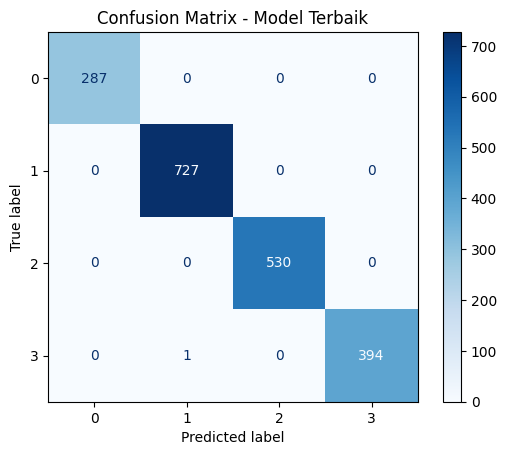

In [24]:
# Gunakan model terbaik dari tuning
final_model = best_rf

# Prediksi pada data uji
y_pred = final_model.predict(X_test)

# Evaluasi metrik lengkap
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Model Terbaik")
plt.show()

### Kesimpulan:

Berdasarkan confusion matrix dari model terbaik, yaitu **Random Forest**, model mampu mengklasifikasikan data dengan sangat akurat pada seluruh kelas. Data pada kelas 0, 1, dan 2 sepenuhnya diprediksi dengan benar, tanpa ada kesalahan. Hanya pada kelas 3 terdapat 1 data yang diprediksi sebagai kelas 1 atau False Positive. Dengan total kesalahan hanya 1 dari 1.938 data, model ini menunjukkan performa klasifikasi yang sangat tinggi dan presisi. Hal ini menandakan bahwa Random Forest sangat andal dalam membedakan tiap kelas, tidak menunjukkan gejala overfitting maupun underfitting, dan cocok diterapkan pada data serupa secara konsisten.

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

In [26]:
# Model sebelum tuning
dt = DecisionTreeClassifier().fit(X_train, y_train)
rf = RandomForestClassifier().fit(X_train, y_train)
svm = SVC().fit(X_train, y_train)
knn = KNeighborsClassifier().fit(X_train, y_train)
rf = RandomForestClassifier().fit(X_train, y_train)
nb = GaussianNB().fit(X_train, y_train)

# Evaluasi
dt_before = evaluate_model(dt, X_test, y_test)
rf_before = evaluate_model(rf, X_test, y_test)
svm_before = evaluate_model(svm, X_test, y_test)
knn_before = evaluate_model(knn, X_test, y_test)
rf_before = evaluate_model(rf, X_test, y_test)
nb_before = evaluate_model(nb, X_test, y_test)

# Model setelah tuning
best_dt = grid_dt.best_estimator_
best_rf = random_rf.best_estimator_
best_svm = grid_svm.best_estimator_
best_knn = grid_knn.best_estimator_
best_rf = random_rf.best_estimator_
best_nb = grid_nb.best_estimator_

# Evaluasi ulang
dt_after = evaluate_model(best_dt, X_test, y_test)
rf_after = evaluate_model(best_rf, X_test, y_test)
svm_after = evaluate_model(best_svm, X_test, y_test)
knn_after = evaluate_model(best_knn, X_test, y_test)
rf_after = evaluate_model(best_rf, X_test, y_test)
nb_after = evaluate_model(best_nb, X_test, y_test)

# Buat dataframe
comparison = pd.DataFrame([
    {'Model': 'Decision Tree', 'Versi': 'Sebelum Tuning', **dt_before},
    {'Model': 'Decision Tree', 'Versi': 'Sesudah Tuning', **dt_after},
    {'Model': 'Random Forest', 'Versi': 'Sebelum Tuning', **rf_before},
    {'Model': 'Random Forest', 'Versi': 'Sesudah Tuning', **rf_after},
    {'Model': 'SVM', 'Versi': 'Sebelum Tuning', **svm_before},
    {'Model': 'SVM', 'Versi': 'Sesudah Tuning', **svm_after},
    {'Model': 'KNN', 'Versi': 'Sebelum Tuning', **knn_before},
    {'Model': 'KNN', 'Versi': 'Sesudah Tuning', **knn_after},
    {'Model': 'Naive Bayes', 'Versi': 'Sebelum Tuning', **nb_before},
    {'Model': 'Naive Bayes', 'Versi': 'Sesudah Tuning', **nb_after}
])

# Drop Confusion Matrix dari tampilan agar fokus ke metrik
comparison_display = comparison.drop(columns=['Confusion Matrix'])

# Tampilkan tabel perbandingan
print(comparison_display)


           Model           Versi  Accuracy  Precision    Recall  F1-Score
0  Decision Tree  Sebelum Tuning  0.999484   0.999485  0.999484  0.999484
1  Decision Tree  Sesudah Tuning  0.999484   0.999485  0.999484  0.999484
2  Random Forest  Sebelum Tuning  0.998453   0.998457  0.998453  0.998452
3  Random Forest  Sesudah Tuning  0.999484   0.999485  0.999484  0.999484
4            SVM  Sebelum Tuning  0.722022   0.757779  0.722022  0.725656
5            SVM  Sesudah Tuning  0.981949   0.981937  0.981949  0.981902
6            KNN  Sebelum Tuning  0.920578   0.921449  0.920578  0.920048
7            KNN  Sesudah Tuning  0.945848   0.946547  0.945848  0.945599
8    Naive Bayes  Sebelum Tuning  0.987622   0.987736  0.987622  0.987642
9    Naive Bayes  Sesudah Tuning  0.987622   0.987736  0.987622  0.987642


### Analisis

**1. Decision Tree**

  Decision Tree sejak awal sudah menunjukkan performa sangat tinggi dengan akurasi dan F1-score mencapai 99.95%, dan tidak mengalami peningkatan setelah tuning. Ini menandakan bahwa model sudah optimal bahkan tanpa penyesuaian hyperparameter. Model ini stabil dan tidak menunjukkan overfitting. Rekomendasinya, DT sudah sangat layak digunakan langsung, namun tetap perlu pengujian berkala jika data bertambah atau berubah signifikan.

**2. Random Forest**

  Random Forest mengalami sedikit peningkatan dari 99.85% menjadi 99.95% setelah tuning, sehingga hasil akhirnya menyamai Decision Tree. Model ini sangat akurat dan memiliki keunggulan dalam stabilitas karena bersifat ensemble. Rekomendasinya, RF cocok dipilih jika ingin model yang lebih tahan terhadap variasi data, meski lebih kompleks dari segi interpretasi.

**3. SVM (Support Vector Machine)**

  SVM menunjukkan peningkatan drastis setelah tuning, dari akurasi 72.20% menjadi 98.19%. Ini menunjukkan tuning sangat krusial bagi SVM, karena default hyperparameter menyebabkan underfitting. Setelah tuning, model sangat kompetitif dengan metrik tinggi dan stabil. Rekomendasinya, SVM setelah tuning bisa menjadi model andalan, terutama jika data berskala kecil hingga sedang, dan jika stabilitas model menjadi prioritas.

**4. KNN (K-Nearest Neighbors)**

  KNN meningkat dari 92.06% menjadi 94.58% pasca tuning. Meski tidak setinggi DT, RF, atau SVM, peningkatannya menunjukkan model cukup responsif terhadap tuning. Model ini cenderung lebih sensitif terhadap skala data dan noise. Karena metriknya sudah cukup tinggi setelah tuning dan tidak menunjukkan gejala overfitting, KNN bisa dijadikan alternatif model jika interpretasi sederhana berbasis kedekatan data dibutuhkan. Rekomendasinya, disarankan untuk melakukan normalisasi atau scaling jika data sangat bervariasi dalam skala.

**5. Naive Bayes**

  Naive Bayes tidak mengalami peningkatan apapun setelah tuning, tetap di angka 98.76% akurasi. Performanya cukup tinggi, namun tidak sebaik model lain. Karena kecepatan dan efisiensinya, NB cocok untuk penggunaan cepat, namun asumsi independensi antar fitur tetap menjadi batasan. Rekomendasinya, jika hasil tuning ini konsisten di data lain, NB bisa digunakan karena ringan dan cepat. Namun, tetap perlu pengujian lebih lanjut terhadap kestabilannya, terutama pada data baru.